In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Add, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model,Sequential
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import tensorflow as tf
from keras.layers import merge


In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import codecs
with codecs.open("/content/drive/MyDrive/Colab Notebooks/chatbot/movie_lines_cleaned.txt", "rb", encoding="utf-8", errors="ignore") as f:
    lines = f.read().split("\n")

In [105]:
lines[:4]

['They do not!', 'They do to!', 'I hope so.', 'She okay?']

In [106]:
context_and_target = []
for i in range(0, len(lines), 2):
  context_and_target.append((lines[i], lines[i+1]))

In [107]:
context_and_target= context_and_target[:152356]

In [108]:
context, target = zip(*context_and_target)


In [109]:
len(target), len(context)

(152356, 152356)

In [110]:
def convert(set):
    return list(set)

context = convert(context)
target = convert(target)

##Clean the text data

In [111]:
context = list (context)
target = list (target)

In [112]:
len(context), len(target)

(152356, 152356)

In [113]:
len(target)

152356

In [114]:
import re
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"let's", "lets", text)
    text = re.sub(r"em", "them", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"gotta", "got to", text)
    text = re.sub(r"outta", "out of", text)
    text = re.sub(r"gotcha", "got you", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"whaddya", "what do you", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"wid", "with", text)
    text = re.sub(r"everyone's", "everyone is", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"that ain't", "that is not", text)
    text = re.sub(r"they ain't", "they are not", text)
    text = re.sub(r"i ain't", "i am not", text)
    text = re.sub(r"he ain't", "he is not", text)
    text = re.sub(r"she ain't", "she is not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    re.sub(r"\'s", "", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", " ", text)
    
    return text

In [115]:
re.sub(r"\'s", "", "let's")

'let'

In [116]:
tidy_target = []
#every conversation passed of target 
for conve in target:
    text = clean_text(conve)
    tidy_target.append(text)

In [117]:
len(tidy_target)

152356

In [118]:
tidy_context = []
#every conversation of context passed
for conve in context:
    text = clean_text(conve)
    tidy_context.append(text)

In [119]:
len(tidy_context), len(tidy_target)

(152356, 152356)

In [120]:
contextdf1= pd.DataFrame(tidy_context, columns=['context'])
targetdf1= pd.DataFrame(tidy_target, columns=['target'])

In [121]:
targetdf1.shape, contextdf1.shape

((152356, 1), (152356, 1))

In [122]:
lines= pd.concat([contextdf1, targetdf1], axis=1)

In [123]:
lines.drop_duplicates(inplace= True)
lines= lines.sample(n= 30000, random_state=42)
lines.head()

,context,target
4476,gosh that is a pretty name buy you a drink,lyla devereux
51190,no gas car dead we need gas i do not wan...,this car runs on gas
39961,hey betty are you okay,oh appreciate it i was trying to ahh give ...
149180,there was a crash last year they just got a f...,do not like airlines lousy unions
125343,so anyway they closed the doors and she star...,crash paranoia


In [124]:
#Lowercase all characters
lines['context']=lines['context'].apply(lambda x: x.lower())
lines['target']=lines['target'].apply(lambda x: x.lower())

# Remove quotes
lines['context']=lines['context'].apply(lambda x: re.sub("'", '', x))
lines['target']=lines['target'].apply(lambda x: re.sub("'", '', x))

exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines['context']=lines['context'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['target']=lines['target'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines['context']=lines['context'].apply(lambda x: x.translate(remove_digits))
lines['target']=lines['target'].apply(lambda x: x.translate(remove_digits))


# Remove extra spaces
lines['context']=lines['context'].apply(lambda x: x.strip())
lines['target']=lines['target'].apply(lambda x: x.strip())
lines['context']=lines['context'].apply(lambda x: re.sub(" +", " ", x))
lines['target']=lines['target'].apply(lambda x: re.sub(" +", " ", x))
lines['target']=lines['target'].apply(lambda x: 'START_ ' + x + ' _END')

# Add start and end tokens to target sequences

In [125]:
lines.shape

(30000, 2)

In [126]:
lines['context'].values[:20]

array(['gosh that is a pretty name buy you a drink',
       'no gas car dead we need gas i do not want to get shot for running out of gas',
       'hey betty are you okay',
       'there was a crash last year they just got a favorable ruling on a lawsuit even the plaintiffs do not know',
       'so anyway they closed the doors and she starts to scream i have never in my life heard anyone scream quite like that',
       'looks like the alternator', 'he is so great u you u hire him',
       'come here',
       'yeah i am still at bellevue the john doe did not pan out but you will never guess whos lying up in the meat locker',
       'if kats not going you are not going', 'what about you',
       'i was yeah i was thinking about going there for business',
       'hello yes what is on your mind baxter',
       'have you ever been to that station', 'what',
       'swear on jimmys grave',
       'she runs a kind of hair dress ing and you know beauty salon',
       'see the jews love to separ

In [127]:
# lines['target'] = lines['target'].apply(lambda x : 'START_ '+ x + ' _END')
# lines['length_cont_sentence']=lines['context'].apply(lambda x:len(x.split(" ")))
# lines['length_target_sentence']=lines['target'].apply(lambda x:len(x.split(" ")))

# lines=lines[lines['length_cont_sentence']<=20]
# lines=lines[lines['length_target_sentence']<=20]
# print("maximum length of Spanish Sentence ",max(lines['length_cont_sentence']))
# print("maximum length of English Sentence ",max(lines['length_target_sentence']))

# max_length_src=max(lines['length_cont_sentence'])
# max_length_tar=max(lines['length_target_sentence'])

In [128]:
lines.shape

(30000, 2)

In [129]:
# import os
# import numpy as np
# def load_npy_to_any(path='', name='/content/word-glove-target-idx2word.npy'):
#     """Load .npy file.

#     Examples
#     ---------
#     - see save_any_to_npy()
#     """
#     file_path = os.path.join(path, name)
#     try:
#         npy = np.load(file_path, allow_pickle=True).item()
#     except:
#         npy = np.load(file_path, allow_pickle=True)
#     finally:
#         try:
#             return npy
#         except:
#             print("[!] Fail to load %s" % file_path)
#             exit()

In [130]:
### Get English and Spanish Vocabulary
all_cont_words=set()
for i in lines['context']:
    for word in i.split():
        if word not in all_cont_words:
            all_cont_words.add(word)

all_target_words=set()
for i in lines['target']:
    for word in i.split():
        if word not in all_target_words:
            all_target_words.add(word)


In [131]:
lines.shape

(30000, 2)

In [132]:
input_words = sorted(list(all_cont_words))
target_words = sorted(list(all_target_words))

totalword= input_words + target_words
totalword= list(set(totalword))

num_encoder_tokens = len(totalword)

num_encoder_tokens = num_encoder_tokens+1 #for zero padding

input_token_index = dict([(word, i+1) for i, word in enumerate(totalword)])#(avoiding index 0 for lstm layer)
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())

lines = shuffle(lines)
lines.head(-20)

,context,target
68081,forget it bunghole,START_ me first _END
53013,why do you want me to go back to my parents th...,START_ i am not ever been there but it do not ...
112742,yes i am very sorry,START_ did you kill all those guards _END
6833,maybe but that do not make me a killer,START_ you hated west more than any of us _END
56432,you are an animal,START_ it dies we live _END
...,...,...
109724,expect it did you get anything from the room,START_ he will be contacting us again _END
87921,alert all commands calculate every possible de...,START_ lord vader our ships have completed the...
14947,what,START_ we got to be close _END
70270,well i did not see him anymore i will tell you...,START_ i do not know if you can fire a psychia...


In [133]:
input_token_index['START_']

2672

In [134]:
num_encoder_tokens

24783

In [135]:

lines['length_cont_sentence']=lines['context'].apply(lambda x:len(x.split(" ")))
lines['length_target_sentence']=lines['target'].apply(lambda x:len(x.split(" ")))

lines=lines[lines['length_cont_sentence']<=20]
lines=lines[lines['length_target_sentence']<=20]
print("maximum length of Spanish Sentence ",max(lines['length_cont_sentence']))
print("maximum length of English Sentence ",max(lines['length_target_sentence']))

max_length_src=max(lines['length_cont_sentence'])
max_length_tar=max(lines['length_target_sentence'])

maximum length of Spanish Sentence  20
maximum length of English Sentence  20


In [136]:
lines.iloc[:7]['context']

68081                         forget it bunghole
112742                       yes i am very sorry
6833      maybe but that do not make me a killer
56432                          you are an animal
138865                             lucien baines
92512                             i got no music
75087                                   what did
Name: context, dtype: object

In [137]:
lines.iloc[:7]['target']

68081                               START_ me first _END
112742         START_ did you kill all those guards _END
6833      START_ you hated west more than any of us _END
56432                        START_ it dies we live _END
138865                           START_ he hates me _END
92512                       START_ you are for real _END
75087                        START_ hey captain god _END
Name: target, dtype: object

In [138]:
X, y = lines['context'], lines['target']
testX, testy = lines['context'], lines['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
# X_train.shape, X_test.shape

##Generator to generate the data for training

In [139]:
def generate_batch(x1, y1, batch_size):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(x1), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_encoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(x1[j:j+batch_size], y1[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = input_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, input_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

##Create the model

In [140]:
#Model
#curent dimesion of data is 128 batch size, 20, num_encoder_tokens
latent_dim=300
# Encoder input in any shape, here None is batch size but data will be 128 batch size, 20 timesteps
encoder_inputs = Input(shape=(None, ))

#embedding layer:- input layer is vocabulary , output dimension of embedding layer with None batch size, maskzero only if input is of variable length 
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero= True)(encoder_inputs)





In [141]:
enc_emb.shape

TensorShape([None, None, 300])

In [142]:
encoder_lstm = LSTM(latent_dim, return_state=True, activation="tanh", recurrent_activation="sigmoid", return_sequences= True)
#the output of 1st lstm is (None, 20, latent dims)

backward_lstm2= LSTM(latent_dim, return_state=True, activation="tanh", recurrent_activation="sigmoid", return_sequences= True, go_backwards=True)

encoderbilstm= Bidirectional(layer= encoder_lstm, backward_layer= backward_lstm2, merge_mode= 'sum')(enc_emb)




In [143]:
encoderbilstm[0]

<KerasTensor: shape=(None, None, 300) dtype=float32 (created by layer 'bidirectional_2')>

In [144]:
# below used hidden and cell state of last model
encoder_lstm2 = LSTM(latent_dim, return_state=True, activation="tanh", recurrent_activation="sigmoid")
#the output of 1st lstm is (None, 20, latent dims)

backward_lstm3= LSTM(latent_dim, return_state=True, activation="tanh", recurrent_activation="sigmoid", go_backwards=True)
# input layer for lstm must be 3D https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
bidir2= Bidirectional(layer= encoder_lstm2, backward_layer= backward_lstm3, merge_mode= 'sum')(encoderbilstm[0], initial_state= encoderbilstm[1:])


In [145]:
bidir2[1].dtype

tf.float32

In [146]:
#first normal lstm hidden states are generated than lstm with backward layer are generated
forwardh, forwardc, backwardh, backwardc= bidir2[1], bidir2[2], bidir2[3], bidir2[4]

In [147]:
stateh= tf.add(forwardh,backwardh)
statec= tf.add(forwardc,backwardc)
state= [stateh, statec]

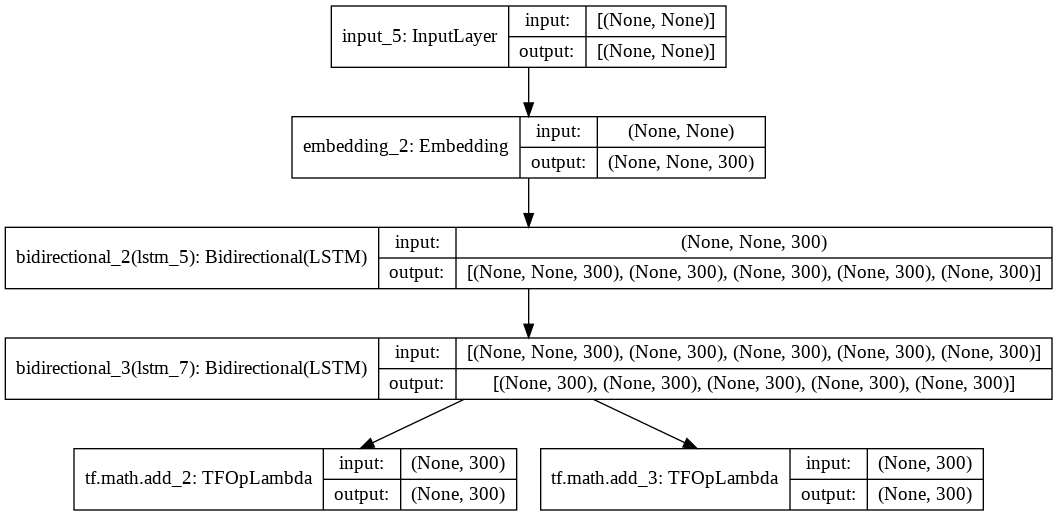

In [148]:
encodermodel=Model(encoder_inputs, [state])
from tensorflow.keras.utils import plot_model
plot_model(encodermodel, show_shapes=True)


In [149]:

decoder_inputs = Input(shape=(None, ))
#in teacher forcing alwayas correct output is passed to training hence attention model can e applied directly to decoder input
#embedding layer:- input layer is vocabulary , output dimension of embedding layer with None batch size, maskzero only if input is of variable length 
decoder_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero= True)(decoder_inputs)

#reverse of target is not required and eturn sequence is true as we need 3 dimensional target output
decoderlstm1= LSTM(latent_dim, return_state=True, activation="tanh", recurrent_activation="sigmoid", return_sequences= True)

decodedlstmlayer, _, _=decoderlstm1(decoder_emb, initial_state= [stateh, statec])
timedistributedlayer= TimeDistributed(Dense(num_encoder_tokens, activation= 'softmax'))
decodedlstmlayer= timedistributedlayer(decodedlstmlayer)
#there should no lambda used for attenteion embedding layer in decoder should be replaced with attention layer, keep return sequenc as false for decoder






In [150]:
model= Model([encoder_inputs, decoder_inputs], [decodedlstmlayer])

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics= ['accuracy'])

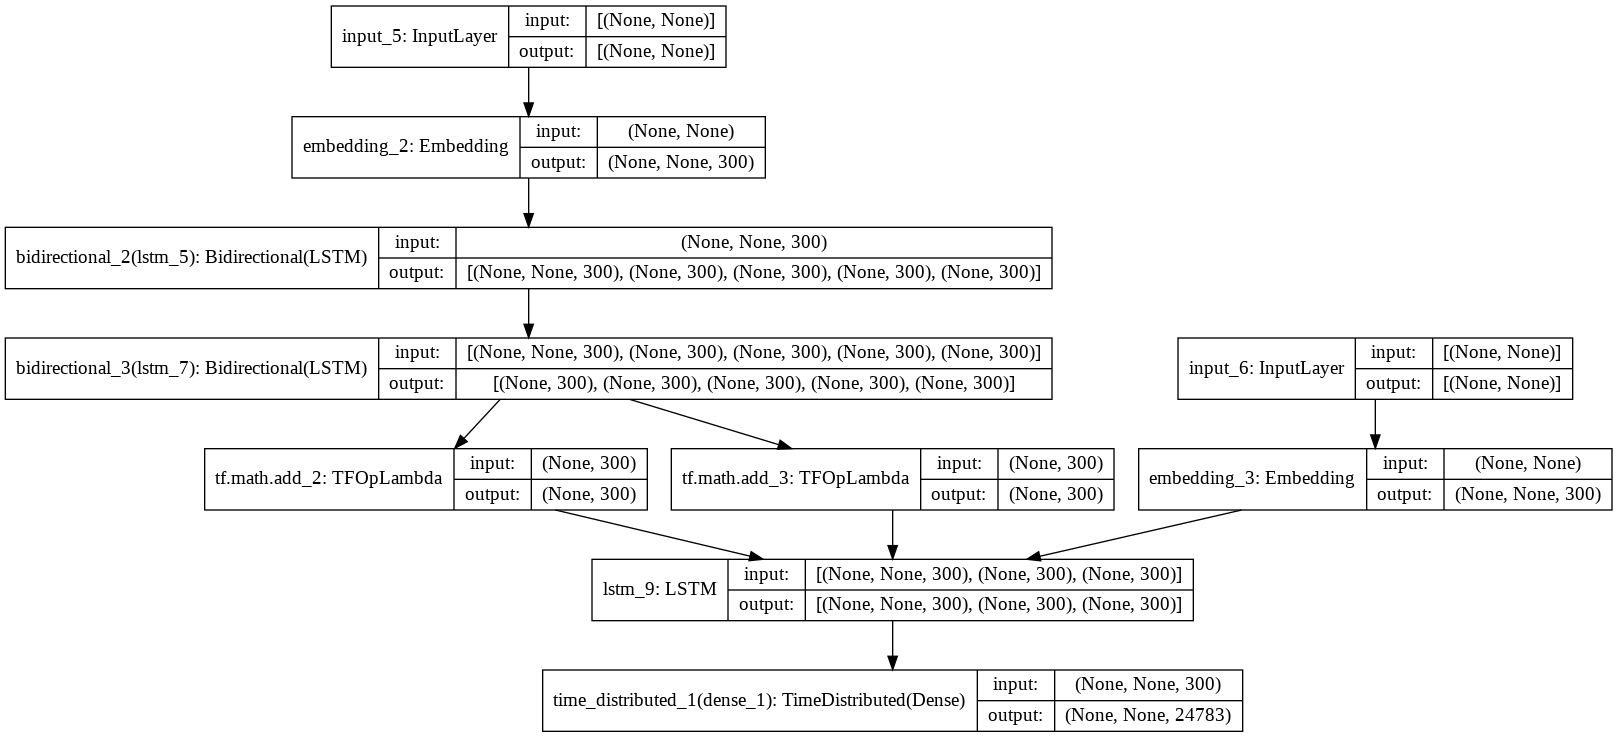

In [151]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [152]:
a= Input(shape= (300, ))
b= Input(shape= (300, ))
combinestates= [a,b]
decodedlstmlayer1, h, c=decoderlstm1(decoder_emb, initial_state= combinestates)
decodedlstmlayer1= timedistributedlayer(decodedlstmlayer1)
combinedoutputstate= [h,c]
decodermodel= Model([decoder_inputs] + combinestates, [decodedlstmlayer1] + combinedoutputstate)


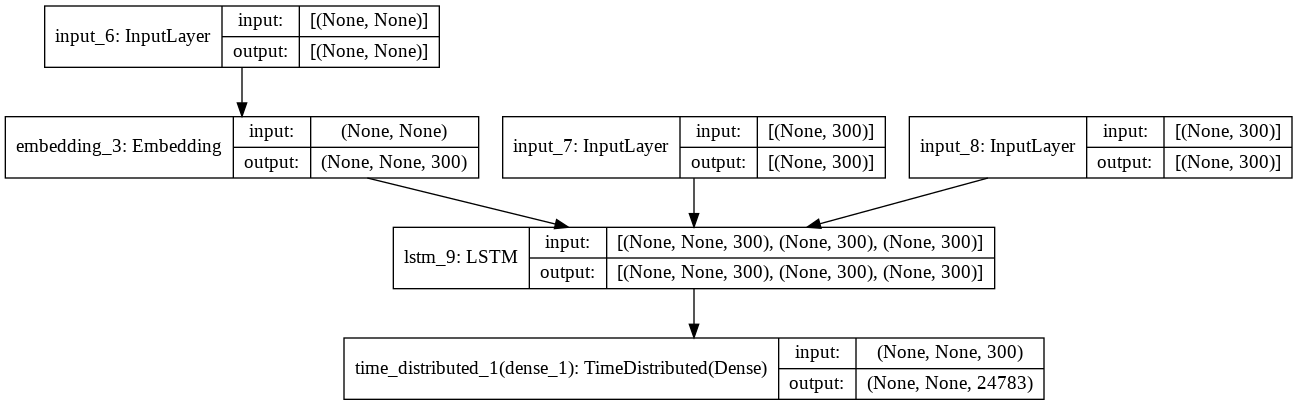

In [153]:

plot_model(decodermodel, show_shapes=True)

In [154]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 300)    7434900     input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) [(None, None, 300),  1442400     embedding_2[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [155]:
train_samples = len(X)
batch_size = 64
epochs = 105



In [156]:
train_samples, num_encoder_tokens

(21776, 24783)

##Train the model

In [157]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor= 'loss', mode= 'min', verbose= 1, patience= 10)
mc= ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/chatbot/chatbot.h5', monitor= 'accuracy', mode= 'max', verbose= 1, save_best_only= True)
model.fit_generator(generator = generate_batch(X, y, batch_size = batch_size),steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,callbacks= [mc, es])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/105
340/340 [==============================] - 87s 212ms/step - loss: 2.4686 - accuracy: 0.1333

Epoch 00001: accuracy improved from -inf to 0.13331, saving model to /content/drive/MyDrive/Colab Notebooks/chatbot/chatbot.h5
Epoch 2/105
340/340 [==============================] - 72s 212ms/step - loss: 2.1377 - accuracy: 0.1817

Epoch 00002: accuracy improved from 0.13331 to 0.18174, saving model to /content/drive/MyDrive/Colab Notebooks/chatbot/chatbot.h5
Epoch 3/105
340/340 [==============================] - 72s 213ms/step - loss: 2.0032 - accuracy: 0.2098

Epoch 00003: accuracy improved from 0.18174 to 0.20981, saving model to /content/drive/MyDrive/Colab Notebooks/chatbot/chatbot.h5
Epoch 4/105
340/340 [==============================] - 72s 213ms/step - loss: 1.9295 - accuracy: 0.2201

Epoch 00004: accuracy improved from 0.20981 to 0.22009, saving model to /content/drive/MyDrive/Colab Notebooks/chatbot/chatbot.h5
Epoch 5/105
340/340 [==============================] - 72s 213m

In [158]:
#iuhbjhv

In [159]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/chatbot/nmt_weights.h5')

In [160]:
model_json = encodermodel.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/chatbot/encodermodel1.json", "w") as json_file:
    json_file.write(model_json)

encodermodel.save_weights("/content/drive/MyDrive/Colab Notebooks/chatbot/encoder_model1.h5")
print("Saved Model!")

Saved Model!


In [168]:
model_json = decodermodel.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/chatbot/decodermodel1.json", "w") as json_file:
    json_file.write(model_json)

decodermodel.save_weights("/content/drive/MyDrive/Colab Notebooks/chatbot/decoder_model.h5")
print("Saved Model!")

Saved Model!


In [162]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encodermodel.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = input_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decodermodel.predict([target_seq] + states_value)

        # Sample a token/ it used last time stamp which is only one so doenst matter
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_input_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 20):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [163]:
train_gen = generate_batch(X, y, batch_size = 1)
k=-1


In [164]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input  sentence:', X[k:k+1].values[0])
print('Actual  conversation:', y[k:k+1].values[0][6:-4])
print('Predicted word:', decoded_sentence[:-4])

Input  sentence: forget it bunghole
Actual  conversation:  me first 
Predicted word:  me first 


In [189]:
def chatbot(cases):

  for i in range(cases):
    stringss= input('START THE CONVERSATION::::')
    stringss= clean_text(stringss)
    stringss= ' '.join(stringss.split())
    stringss= stringss.strip()
    newdata= np.zeros((1, max_length_src),dtype='float32')
    for t, word in enumerate(stringss.split()):
      newdata[0, t] = input_token_index[word]

    decoded_sentence = decode_sequence(newdata)
    print('CHATBOT:::::', decoded_sentence[:-4])
  print('HURRAY DONE......!!!!!')



In [190]:
chatbot(2)


START THE CONVERSATION::::bye
CHATBOT:::::  great bye 
START THE CONVERSATION::::i was joking
CHATBOT:::::  whatever you say 
HURRAY DONE......!!!!!
